# Python yordamida ko'p chiziqli regressiya

In [3]:
import pandas as pd
import numpy as np
import string
import csv
import random
import warnings


In [4]:
## Modelni qurish 
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Ma'lumotlarni vizualazizatsiyalash
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ta’lim texnikasi, o‘quvchilarning faolligi va ta’lim natijalari to‘g‘risidagi ma’lumotlardan foydalangan holda o‘quvchilar faoliyatini yaxshilashda turli o‘qitish usullarining samaradorligi ma’lumotlari mavjud. Mavjud ma’lumotlar asosida quyidagilarni aniqlang :

## 1. Ma’lumotlar bazasidagi har bir atribut orasidagi tarqalish grafigini hosil qiling.

In [5]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('task_2.csv', sep=',')

print(df_pie.shape)
df_pie


(30, 3)


,ta'lim texnikasi,o'quvchilarning faolligi,natijasi
0,6,36,2
1,3,60,2
2,7,58,2
3,4,58,2
4,6,57,2
5,2,40,2
6,6,44,2
7,7,44,2
8,4,58,2
9,3,56,2


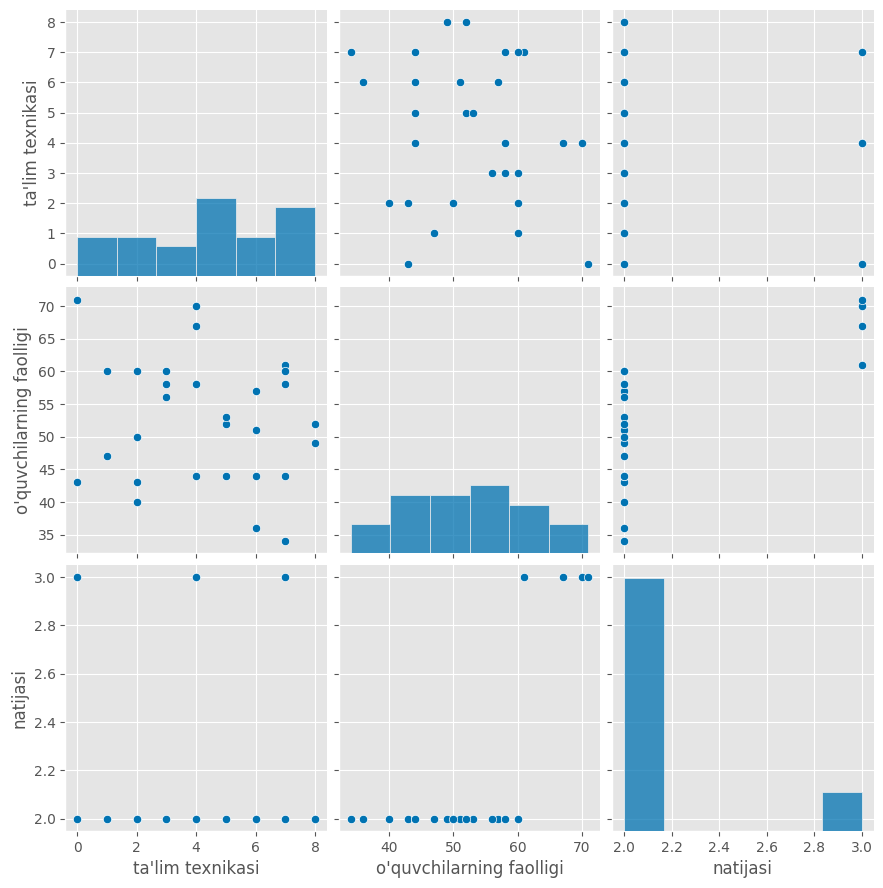

In [6]:
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

## 2. Hosil bo’lgan grafikka ko’ra, atributlarning bir-biriga bog’liqligini o’rganing. Hisobot shaklida mustaqil va bog’liq o’zgaruvchilarni aniqlang

Hosil qilingan ma'lumotga ko'ra, bizda mustaqil o'zgaruvchi bu o'quvchining natijasi (bahosi) va bog'liq o'zgaruvchilar sifatida esa ta'lim texnikasi va o'quvchining faolligi keltrilgan

## 3. Regressiya modelini quring. Qurilgan modelni hisobot shaklida yozing.

In [7]:
df_data = pd.read_csv('task_2.csv', sep=',')
# Mustaqil va bog'liq o'zgaruvchilarni o'rnatish
X = df_data[["ta'lim texnikasi", "o'quvchilarning faolligi"]]
y = df_data["natijasi"]

# Sklearn kutubxonasidan modelni ishga tushirish va uni  ma'lumotlarimizga moslash
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Koeffisiyentlar:', model.coef_)

Intercept: 0.9399711999073297
Koeffisiyentlar: [0.00183893 0.02250863]


Y= 0.9399711999073297 - 0.00183893*X_1 + 0.02250863*X_2

1. Mustaqil o'zgaruvchi sifatida o'quvchilarning talim texnikasi va o'quvchilarni faoligi va bog'liq o'zgaruvchi sifatida o'quvchining natijasi tanlandi. 
2.  Koeffitsiyentlar uchun biz mos ravishda "talim texnikasi" va "o'quvchilarni faoligi" o'zgaruvchilari uchun 2 ta qiymatga egamiz. Bu qiymat bizning mustaqil o'zgaruvchimizning bog'liq o'zgaruvchiga munosabatini ifodalaydi, bunda mustaqil o'zgaruvchida aynan 1 ga o'zgarishi bizning bog'liq o'zgaruvchimizning qiymatini koeffitsiyent bilan bir xil miqdorda o'zgartiradi. Misol uchun, agar o'quvchilar o'rtacha baxosi 60 va undan kamaysa 2 o'zlashtrish darajasi past 61 va 72 bal oralig'i3 baxo, 73 va 86 bal oralig'i 4 aks holda 5 ta'lim texnikasida o'zlashtrish darajasi yuqori deb belgilandi.

## 4. Regressiya modeliga ko’ra, bog’liq o’zgaruvchilarning qiymati aniq bo’lsa, talabaning kursdan kursga qolishini bashorat qiling.

In [8]:
texnikalar = ["Induksiya metodi", "Deduksiya metodi", "Analogiya metodi", "Taqqoslash usuli", "Fikriy hujum metodi", "6x6x6 metodi", "klaster metodi", "zakovatli zukko metodi"]
for i in texnikalar:
    print(i, end=", ")

Induksiya metodi, Deduksiya metodi, Analogiya metodi, Taqqoslash usuli, Fikriy hujum metodi, 6x6x6 metodi, klaster metodi, zakovatli zukko metodi, 

In [18]:
# Bashorat qilinadigan qiymatlar
texnic = input("Ta'lim texnikasi raqamini kiriting (0 dan 8 gacha)? \n")
grade = input("O'quvchining faolligi kiriting  (1 dan 100 gacha) ? \n")

try:
    print('Ta\'lim texnikasi orqasi "{}" baho beradi, Agar ta\'lim texnikasi "{}" bo\'lsa , o\'quvchilar foalligi "{}" bo\'lsa.'.format(
       model.predict([[float(texnic), float(grade)]])[0],
        texnic, 
        grade))
except Exception as e: print(e)
# except ValueError:
    # print('Faqat butun son kiriting:\n- masalan, 1, 4, 7\n- haqiqiy son kiriting e.g. 3.8')


Ta'lim texnikasi raqamini kiriting (0 dan 8 gacha)? 
 8
O'quvchining faolligi kiriting  (1 dan 100 gacha) ? 
 90


Ta'lim texnikasi orqasi "2.9804597179406582" baho beradi, Agar ta'lim texnikasi "8" bo'lsa , o'quvchilar foalligi "90" bo'lsa.
